---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.


> analytical solution by separation of the variables:
$$ y(t) = Ce^{-3t} $$
$$ y_{n+1} = ( 1 - 3 \lambda t ) y_n $$

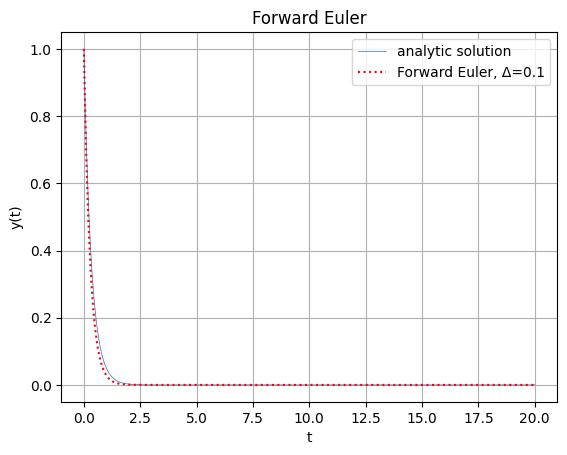

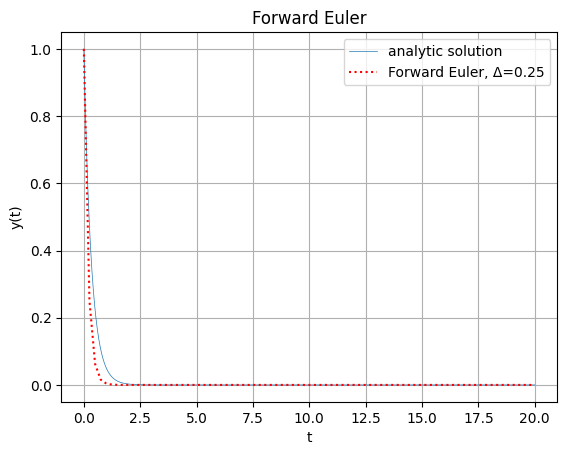

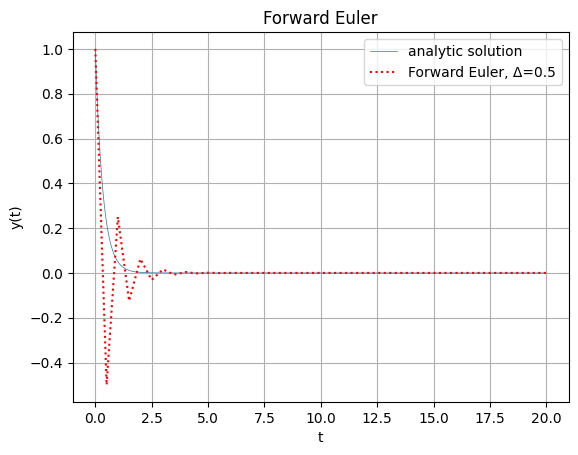

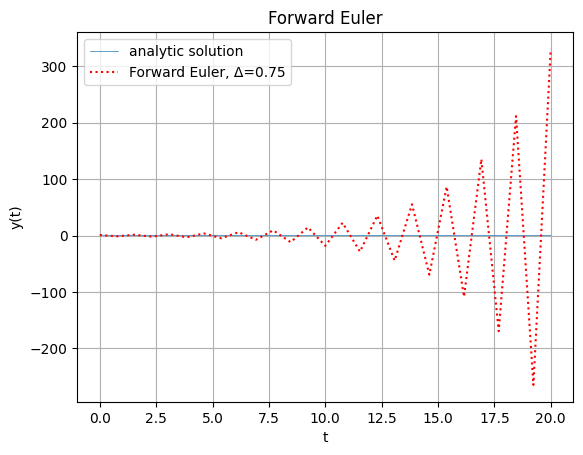

In [19]:

def myForwardEuler( lmbda, y0, dt, T ):
  N= int( T / dt )
  t= np.linspace( 0, T, N+1 )
  y= np.zeros( N + 1 )
  y[0]= y0
  for n in range(N):
    y[n+1]= y[n] + dt * lmbda * y[n]
  return t, y

y0= 1.0
lmbda= -3.0
T= 20.0

for delta in [ 0.1, 0.25, 0.5, 0.75 ]:
  t_num, y_num= myForwardEuler( lmbda, y0, delta, T )
  t_exact= np.linspace( 0, T, 1000 )
  y_exact= y0 * np.exp( lmbda * t_exact )

  plt.figure()
  plt.plot( t_exact, y_exact, linewidth='0.5', label='analytic solution' )
  plt.plot( t_num, y_num, linestyle=':', color='red', label=f'Forward Euler, Δ={delta}' )
  plt.title( 'Forward Euler' )
  plt.xlabel( 't' )
  plt.ylabel( 'y(t)' )
  plt.legend()
  plt.grid()

plt.show()


> Forward Euler is pretty stable for small steps (Δt= 0.1 or 0.25). But with larger step sizes it "explodes".

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

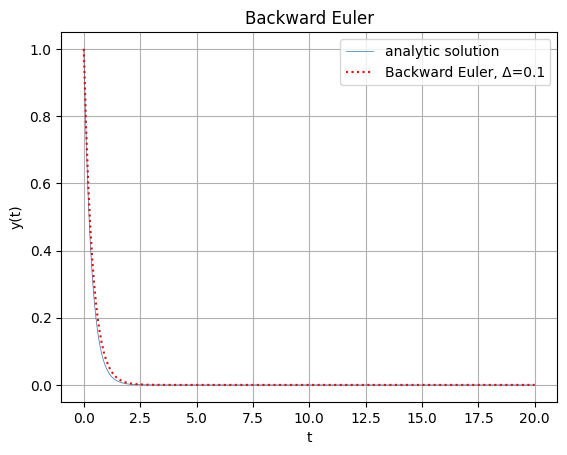

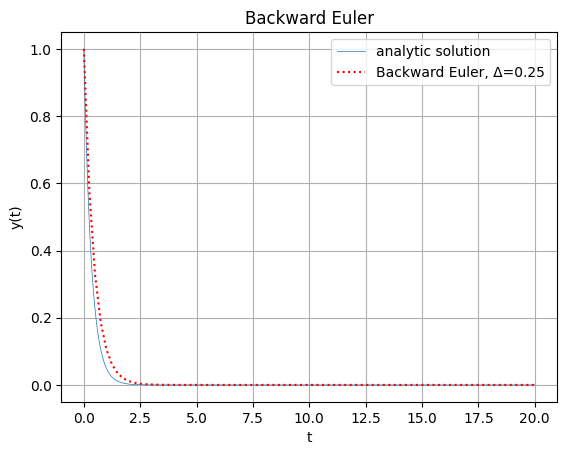

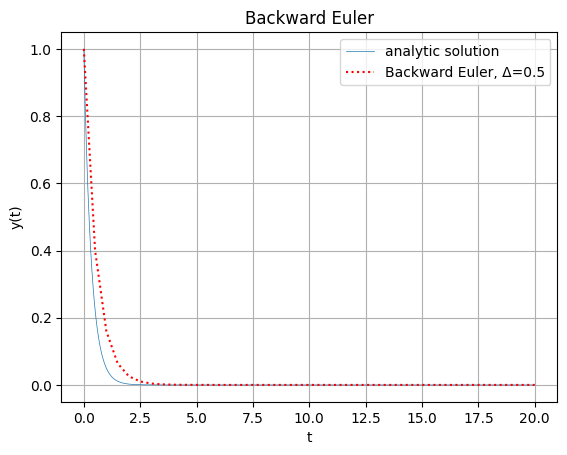

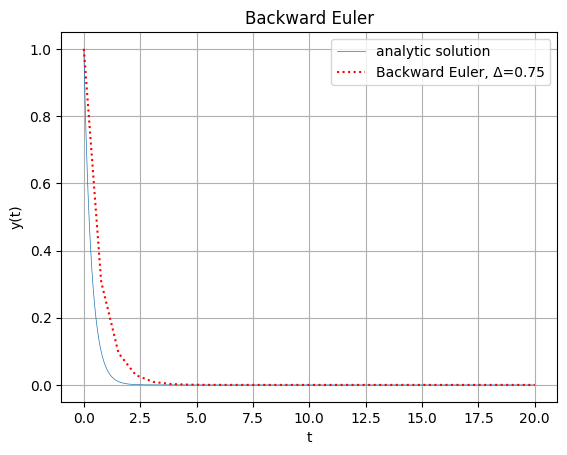

In [ ]:

def myBackwardEuler( lmbda, y0, dt, T ):
  N= int( T / dt )
  t= np.linspace( 0, T, N+1 )
  y= np.zeros( N+1 )
  y[0]= y0
  for n in range( N ):
    y[n+1]= y[n] / ( 1 - dt * lmbda )
  return t, y

y0= 1.0
lmbda= -3.0
T= 20.0

for delta in [0.1, 0.25, 0.5, 0.75]:
  t_num, y_num = myBackwardEuler( lmbda, y0, delta, T )
  t_exact = np.linspace( 0, T, 1000 )
  y_exact = y0 * np.exp( lmbda * t_exact )

  plt.figure()
  plt.plot( t_exact, y_exact, linewidth='0.5', label='analytic solution' )
  plt.plot( t_num, y_num, linestyle=':', color='red', label=f'Backward Euler, Δ={delta}' )
  plt.title( 'Backward Euler' )
  plt.xlabel( 't' )
  plt.ylabel( 'y(t)' )
  plt.legend()
  plt.grid()

plt.show()


> Backward Euler remains stable(r) at larger step sizes, compared to Forward Euler.

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$

> $ y' = Ay + b $ with $ A = \begin{pmatrix}
0 & 1 \\
-5 & -6
\end{pmatrix}, b = \begin{pmatrix}
0  \\
10
\end{pmatrix}, y_0 = \begin{pmatrix}
0 \\
5
\end{pmatrix} $

> $$ y_{n+1​} = y_n ​+ h ( Ay_{n+1} ​ + b ) $$

**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?